In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
# pd.set_option('display.max_rows',None)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data_train = pd.read_csv('train.csv')
# data_test = pd.read_csv('test.csv')

In [3]:
data_train.shape

(147443, 12)

In [0]:
data_train_copy = data_train.copy(deep = True)
# data_test_copy = data_test.copy(deep = True)

In [0]:
# data_train

## Eda

In [0]:
data_train

,LicenseNo,Type,Street,LocationID,Reason,SectionViolations,RiskLevel,Geo_Loc,year,month,date,Inspection_Results
0,4744,345.0,15522,81876.0,1,33.0,3.0,16406,2010.0,4.0,26.0,E
1,2973,186.0,3057,81862.0,3,33.0,3.0,878,2009.0,6.0,21.0,E
2,18223,345.0,14988,81883.0,1,NaN,3.0,3368,2013.0,1.0,5.0,G
3,20825,345.0,3661,81859.0,2,31.0,2.0,11839,2015.0,9.0,28.0,E
4,2136,345.0,7876,81886.0,3,30.0,3.0,12264,2015.0,9.0,12.0,E
...,...,...,...,...,...,...,...,...,...,...,...,...
147438,23001,186.0,6229,81873.0,3,3.0,2.0,203,2015.0,6.0,15.0,B
147439,35329,345.0,3697,81848.0,12,NaN,3.0,7202,2010.0,11.0,28.0,E
147440,5361,345.0,13027,81877.0,1,NaN,2.0,3614,2014.0,9.0,23.0,G
147441,12338,345.0,17833,81888.0,2,3.0,3.0,757,2018.0,1.0,25.0,F


In [31]:
data_train.Inspection_Results.value_counts()

1    79453
2    28456
3    20631
4    12691
5     4747
6     1420
7       45
Name: Inspection_Results, dtype: int64

In [0]:
data_train.Inspection_Results.replace({'E': 1,'B':2,'F' :3,'G' : 4,'D': 5, 'C':6 ,'A':7}, inplace=True) # add main

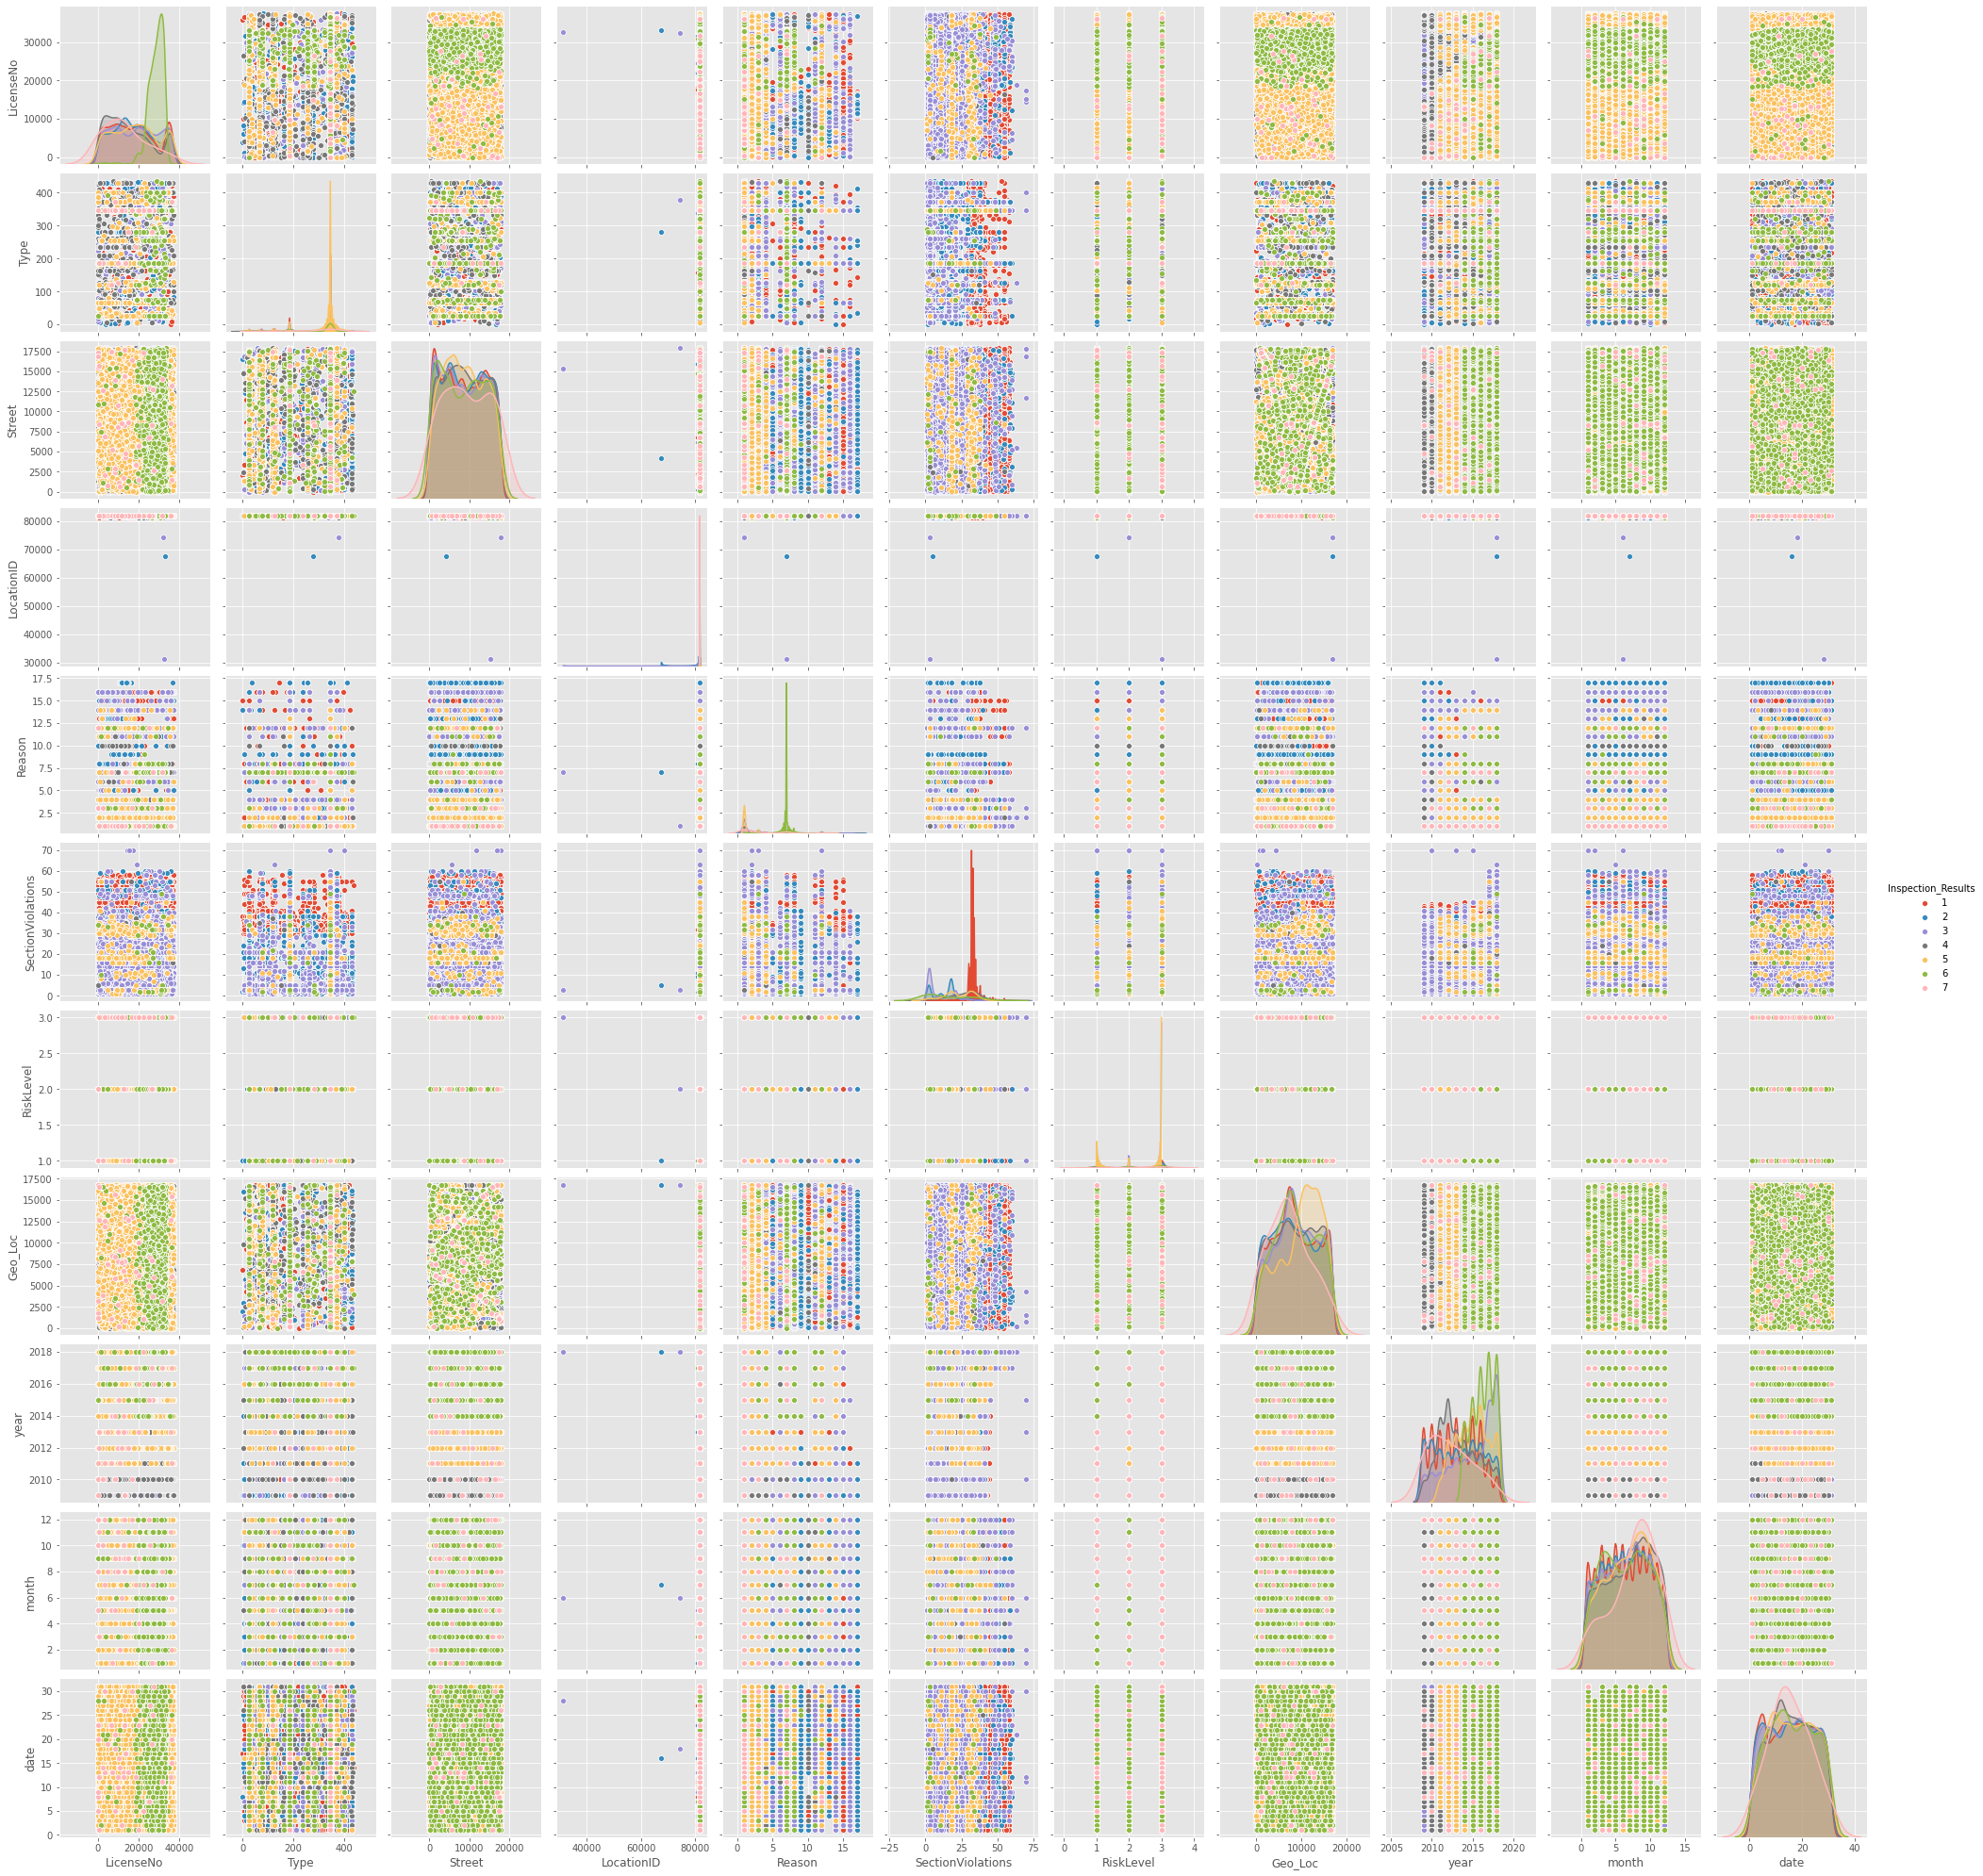

In [0]:
sns.pairplot(data_train, hue = 'Inspection_Results')

### null value imputaion

In [0]:
data_train.info()

In [0]:
data_train.shape

(108235, 12)

In [0]:
data_train.Type.value_counts(dropna = False)

In [0]:
data_train

In [0]:
data_train.isnull().sum()

LicenseNo                 0
Type                   3485
Street                    0
LocationID               35
Reason                    0
SectionViolations     39068
RiskLevel                21
Geo_Loc                   0
year                     53
month                    53
date                     53
Inspection_Results        0
dtype: int64

In [0]:
data_train.SectionViolations.value_counts(dropna = False)

NaN     39068
32.0    19122
33.0    12994
3.0     10598
34.0     7878
        ...  
59.0       13
60.0       11
15.0       10
70.0        3
63.0        1
Name: SectionViolations, Length: 62, dtype: int64

In [0]:
data_train[data_train.SectionViolations.isnull()]

,LicenseNo,Type,Street,LocationID,Reason,SectionViolations,RiskLevel,Geo_Loc,year,month,date,Inspection_Results
2,18223,345.0,14988,81883.0,1,NaN,3.0,3368,2013.0,1.0,5.0,4
7,32170,345.0,5006,81851.0,7,NaN,1.0,7586,2018.0,7.0,16.0,2
8,27027,76.0,4554,81892.0,8,NaN,3.0,10595,2015.0,11.0,8.0,1
10,26522,345.0,16017,81864.0,1,NaN,2.0,1408,2014.0,7.0,12.0,4
12,15323,345.0,17881,81862.0,1,NaN,3.0,735,2016.0,10.0,19.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
147427,20820,345.0,9431,81863.0,1,NaN,2.0,12491,2014.0,8.0,1.0,4
147428,24570,345.0,91,81854.0,7,NaN,3.0,4666,2015.0,9.0,6.0,2
147433,26717,289.0,12524,81854.0,7,NaN,1.0,3886,2017.0,12.0,4.0,1
147439,35329,345.0,3697,81848.0,12,NaN,3.0,7202,2010.0,11.0,28.0,1


In [0]:
data_train[data_train.LocationID.isnull()]

,LicenseNo,Type,Street,LocationID,Reason,SectionViolations,RiskLevel,Geo_Loc,year,month,date,Inspection_Results
2234,11835,186.0,9446,NaN,8,NaN,1.0,5373,2009.0,11.0,1.0,1
5413,2505,345.0,2075,NaN,1,NaN,2.0,5994,2010.0,5.0,23.0,1
9605,8140,345.0,11091,NaN,1,40.0,1.0,13920,2010.0,8.0,30.0,1
21382,12605,NaN,8410,NaN,7,NaN,3.0,6706,2009.0,9.0,13.0,7
23215,4053,345.0,16501,NaN,3,6.0,2.0,16743,2011.0,2.0,21.0,3
24027,11169,345.0,4856,NaN,1,NaN,2.0,10815,2015.0,12.0,13.0,4
30010,22970,371.0,15031,NaN,7,NaN,3.0,2805,2009.0,12.0,16.0,1
36267,4053,345.0,16501,NaN,1,NaN,2.0,16743,2013.0,2.0,4.0,4
37274,36831,186.0,12327,NaN,1,NaN,1.0,15006,2013.0,12.0,22.0,4
45362,12605,NaN,8410,NaN,1,NaN,3.0,6706,2013.0,10.0,23.0,7


In [0]:
from sklearn.impute import KNNImputer             # add main

imputer = KNNImputer(n_neighbors=5)
array = imputer.fit_transform(data_train)

In [0]:
data_train = pd.DataFrame(data = array, columns= data_train.columns, index = data_train.index)  # add main

In [0]:
data_train = np.round(data_train)  # add main

In [0]:
data_train.Inspection_Results.value_counts()

1.0    79453
2.0    28456
3.0    20631
4.0    12691
5.0     4747
6.0     1420
7.0       45
Name: Inspection_Results, dtype: int64

In [0]:
data_train_copy.Inspection_Results.value_counts()

E    79453
B    28456
F    20631
G    12691
D     4747
C     1420
A       45
Name: Inspection_Results, dtype: int64

### features

In [0]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108235 entries, 0 to 147442
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   LicenseNo           108235 non-null  int64  
 1   Type                108235 non-null  float64
 2   Street              108235 non-null  int64  
 3   LocationID          108235 non-null  float64
 4   Reason              108235 non-null  int64  
 5   SectionViolations   108235 non-null  float64
 6   RiskLevel           108235 non-null  float64
 7   Geo_Loc             108235 non-null  int64  
 8   year                108235 non-null  float64
 9   month               108235 non-null  float64
 10  date                108235 non-null  float64
 11  Inspection_Results  108235 non-null  int64  
dtypes: float64(7), int64(5)
memory usage: 10.7 MB


In [0]:
data_train.head(25)

,LicenseNo,Type,Street,LocationID,Reason,SectionViolations,RiskLevel,Geo_Loc,year,month,date,Inspection_Results
0,4744,345.0,15522,81876.0,1,33.0,3.0,16406,2010.0,4.0,26.0,1
1,2973,186.0,3057,81862.0,3,33.0,3.0,878,2009.0,6.0,21.0,1
3,20825,345.0,3661,81859.0,2,31.0,2.0,11839,2015.0,9.0,28.0,1
4,2136,345.0,7876,81886.0,3,30.0,3.0,12264,2015.0,9.0,12.0,1
5,13009,345.0,12275,81877.0,1,18.0,3.0,3935,2016.0,7.0,2.0,2
6,9621,345.0,2133,81887.0,2,32.0,3.0,8876,2011.0,4.0,4.0,1
9,7131,345.0,5899,81877.0,1,32.0,3.0,4082,2012.0,4.0,23.0,1
11,3350,186.0,4538,81867.0,14,33.0,3.0,8797,2016.0,7.0,31.0,1
13,34228,345.0,14317,81905.0,1,16.0,3.0,15780,2014.0,7.0,1.0,2
14,37390,345.0,4306,81846.0,3,2.0,3.0,7773,2014.0,8.0,12.0,3


In [0]:
data_train.Inspection_Results.value_counts(normalize=True) 

1.0    0.538873
2.0    0.192997
3.0    0.139925
4.0    0.086074
5.0    0.032195
6.0    0.009631
7.0    0.000305
Name: Inspection_Results, dtype: float64

In [0]:
for col in data_train.columns:
    print(col)
    print(data_train[col].value_counts())
    print('- ' * 80)
    print(data_train.groupby(col)['Inspection_Results'].value_counts(normalize = True))
    print('=' * 80)
    print()

LicenseNo
0        207
3292      80
2505      41
4640      39
8692      36
        ... 
32313      1
29142      1
27093      1
25044      1
28178      1
Name: LicenseNo, Length: 25695, dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
LicenseNo  Inspection_Results
0          1                     0.444444
           2                     0.342995
           3                     0.188406
           5                     0.014493
           4                     0.004831
                                   ...   
37392      1                     0.777778
           2                     0.111111
           3                     0.111111
37394      1                     0.666667
           2                     0.333333
Name: Inspection_Results, Length: 47823, dtype: float64

Type
345.0    74406
186.0    13616
371.0     8011
76.0      1776
27.0      1669
         ...

In [0]:
# object
Reason     # changae astype
RiskLevel

In [0]:
# Remove
col = LicenseNo

In [0]:
data_train.columns

Index(['LicenseNo', 'Type', 'Street', 'LocationID', 'Reason',
       'SectionViolations', 'RiskLevel', 'Geo_Loc', 'year', 'month', 'date',
       'Inspection_Results'],
      dtype='object')

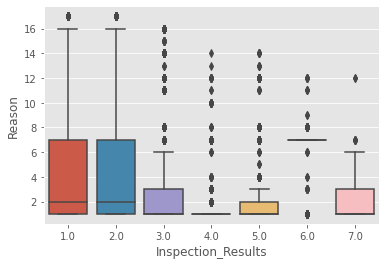

In [0]:
sns.boxplot(x="Inspection_Results", y="Reason", data=data_train)

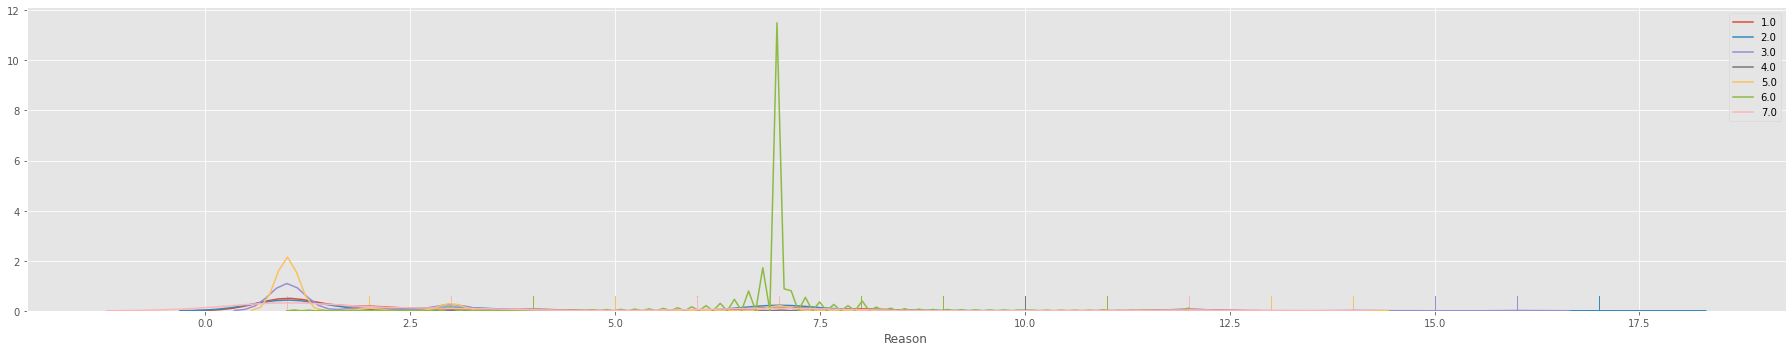

In [0]:
g = sns.FacetGrid(data_train, hue="Inspection_Results", aspect=5,height=5)
pl = g.map(sns.distplot, "Reason",  hist=False, rug=True)
plt.legend()

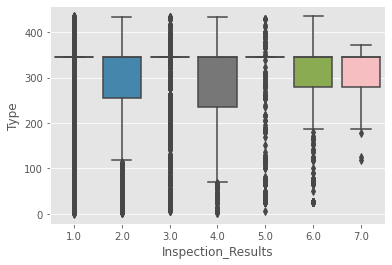

In [0]:
sns.boxplot(x="Inspection_Results", y="Type", data=data_train)   

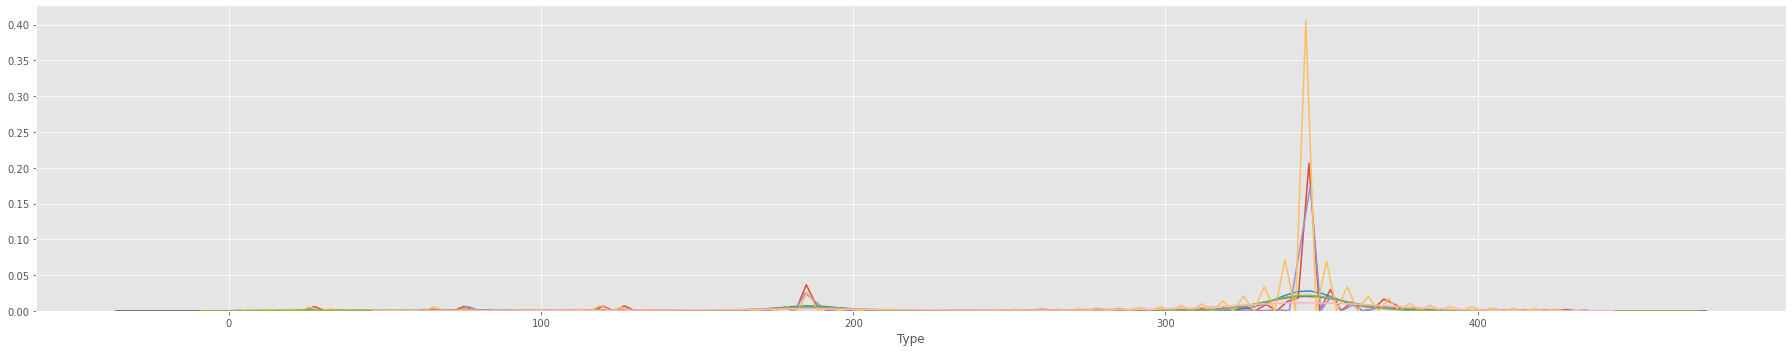

In [0]:
g = sns.FacetGrid(data_train, hue="Inspection_Results", aspect=5,height=5)
pl2 = g.map(sns.distplot, "Type",  hist=False, rug=False)


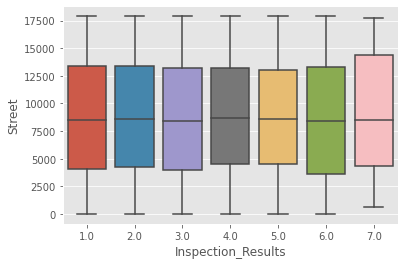

In [0]:
sns.boxplot(x="Inspection_Results", y="Street", data=data_train)   

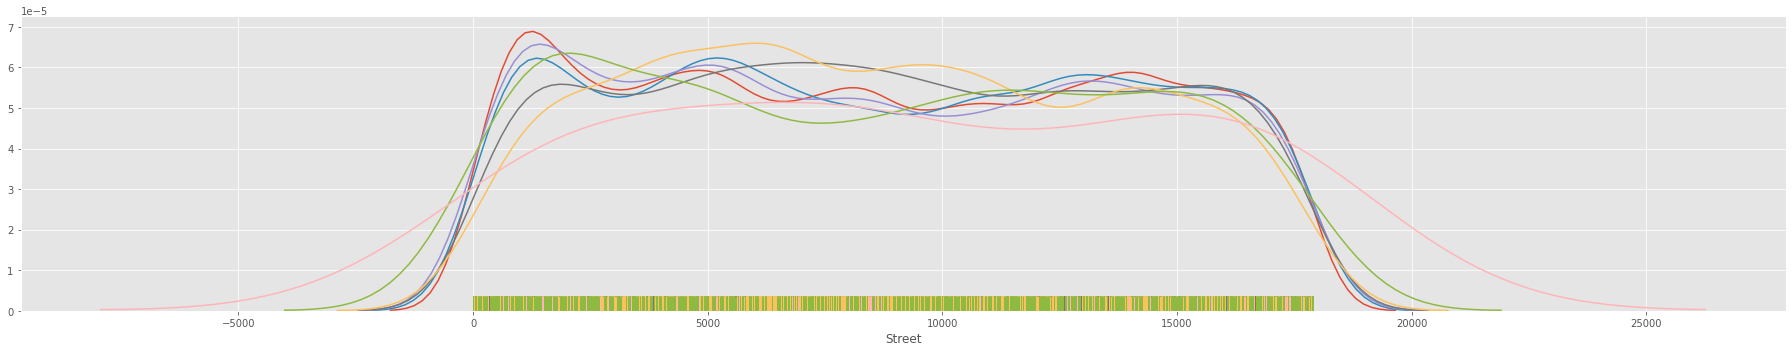

In [0]:
g = sns.FacetGrid(data_train, hue="Inspection_Results", aspect=5,height=5)
pl2 = g.map(sns.distplot, "Street",  hist=False, rug=True)


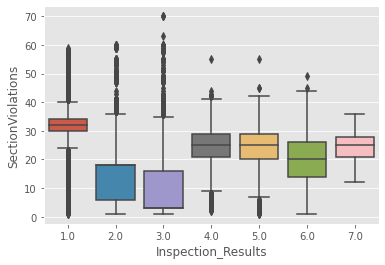

In [0]:
sns.boxplot(x="Inspection_Results", y="SectionViolations", data=data_train)     # good feature

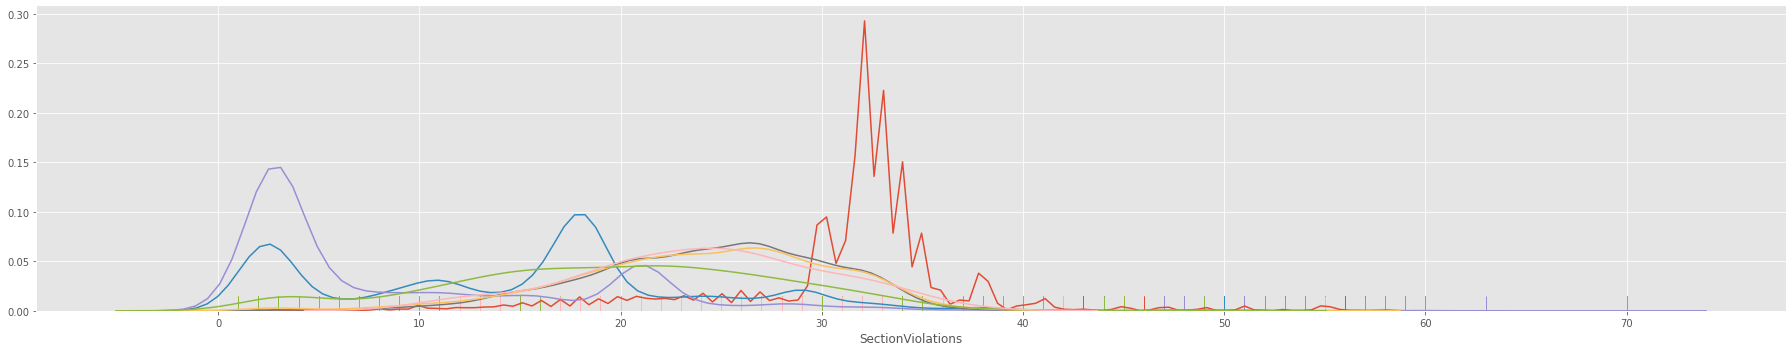

In [0]:
g = sns.FacetGrid(data_train, hue="Inspection_Results", aspect=5,height=5)
pl2 = g.map(sns.distplot, "SectionViolations",  hist=False, rug=True)


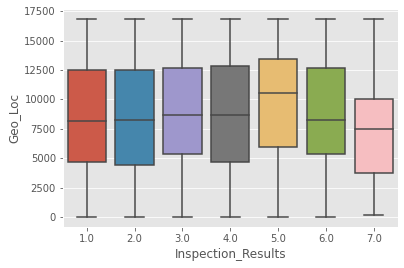

In [0]:
sns.boxplot(x="Inspection_Results", y="Geo_Loc", data=data_train)   

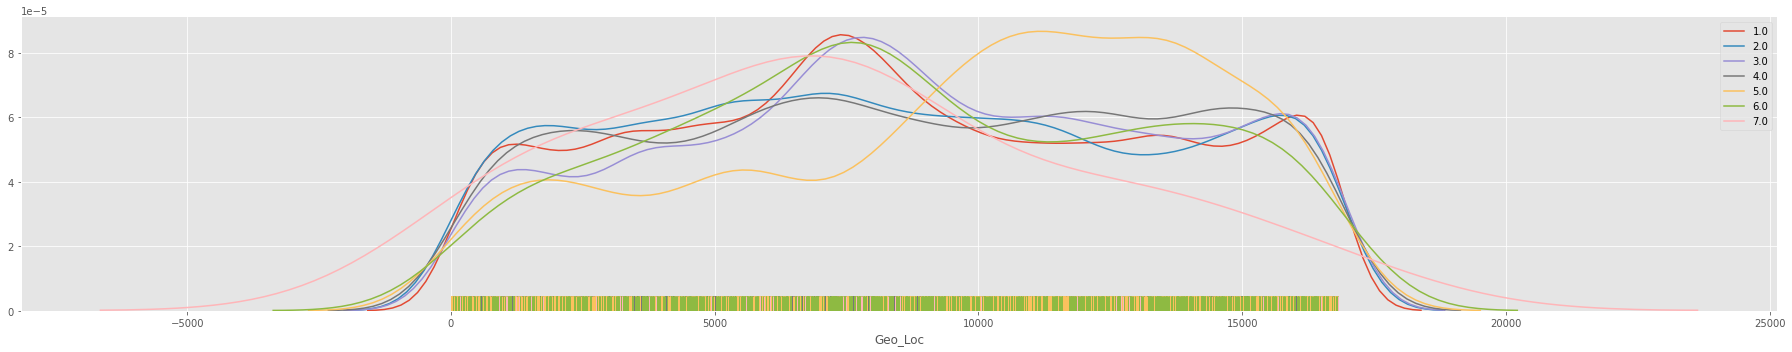

In [0]:
g = sns.FacetGrid(data_train, hue="Inspection_Results", aspect=5,height=5)
pl2 = g.map(sns.distplot, "Geo_Loc",  hist=False, rug=True)
plt.legend()

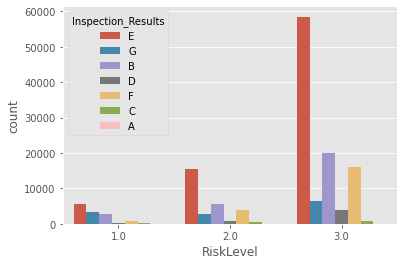

In [0]:
sns.countplot(data_train.RiskLevel,hue = data_train_copy.Inspection_Results)

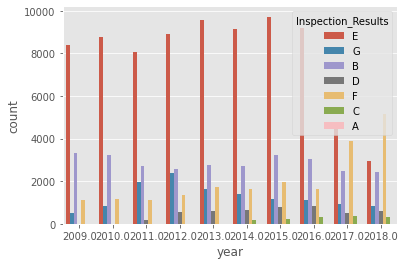

In [0]:
sns.countplot(data_train.year, hue =data_train_copy.Inspection_Results)

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [0]:
X = data_train.drop(columns='Inspection_Results')

In [0]:
# X.info()

In [0]:
# X_le = label_enc(X)

In [0]:
# X_ty = X_le.astype('float64')

In [0]:
X = add_constant(X)
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

const                955506.382466
LicenseNo                 1.086868
Type                      1.077798
Street                    1.002447
LocationID                1.001087
Reason                    1.057031
SectionViolations         1.039957
RiskLevel                 1.095993
Geo_Loc                   1.016337
year                      1.141994
month                     1.008576
date                      1.003003
dtype: float64

In [0]:
y_data = data_train.Inspection_Results

In [0]:
import statsmodels.api as sm

In [0]:
model = sm.MNLogit(y_data, X)
model_fit = model.fit()

Optimization terminated successfully.
         Current function value: 0.819501
         Iterations 26


In [0]:
print(model_fit.summary())

                          MNLogit Regression Results                          
Dep. Variable:     Inspection_Results   No. Observations:               147443
Model:                        MNLogit   Df Residuals:                   147371
Method:                           MLE   Df Model:                           66
Date:                Thu, 07 May 2020   Pseudo R-squ.:                  0.3671
Time:                        12:07:13   Log-Likelihood:            -1.2083e+05
converged:                       True   LL-Null:                   -1.9090e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
Inspection_Results=2       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   57.1401     29.162      1.959      0.050      -0.016     114.296
LicenseNo            -1.793e-06   9.34e-07     -1.919      0.055   -3.62e-06     3.8e-08
Type        

In [0]:
# object
Reason     # changae astype
RiskLevel

In [0]:
# Remove
col = LicenseNo

In [0]:
data_train

,LicenseNo,Type,Street,LocationID,Reason,SectionViolations,RiskLevel,Geo_Loc,year,month,date,Inspection_Results
0,4744.0,345.0,15522.0,81876.0,1.0,33.0,3.0,16406.0,2010.0,4.0,26.0,1.0
1,2973.0,186.0,3057.0,81862.0,3.0,33.0,3.0,878.0,2009.0,6.0,21.0,1.0
2,18223.0,345.0,14988.0,81883.0,1.0,25.0,3.0,3368.0,2013.0,1.0,5.0,4.0
3,20825.0,345.0,3661.0,81859.0,2.0,31.0,2.0,11839.0,2015.0,9.0,28.0,1.0
4,2136.0,345.0,7876.0,81886.0,3.0,30.0,3.0,12264.0,2015.0,9.0,12.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
147438,23001.0,186.0,6229.0,81873.0,3.0,3.0,2.0,203.0,2015.0,6.0,15.0,2.0
147439,35329.0,345.0,3697.0,81848.0,12.0,22.0,3.0,7202.0,2010.0,11.0,28.0,1.0
147440,5361.0,345.0,13027.0,81877.0,1.0,27.0,2.0,3614.0,2014.0,9.0,23.0,4.0
147441,12338.0,345.0,17833.0,81888.0,2.0,3.0,3.0,757.0,2018.0,1.0,25.0,3.0


In [0]:
data_train = data_train.drop(columns= ['LicenseNo'])   #add main

data_train['Reason'] = data_train['Reason'].astype('object')

data_train['RiskLevel'] = data_train['RiskLevel'].astype('object')


In [0]:
data_train.select_dtypes(exclude='object').columns

Index(['Type', 'Street', 'LocationID', 'SectionViolations', 'Geo_Loc', 'year',
       'month', 'date', 'Inspection_Results'],
      dtype='object')

In [0]:
data_train.select_dtypes('object').columns

Index(['Reason', 'RiskLevel'], dtype='object')

###normalize

## func

In [0]:
def type_casting(data):
    df = data
    df['first_payment_date'] = pd.to_datetime(df.first_payment_date, format='%Y%m%d')
    df['origination_date'] = pd.to_datetime(df.origination_date, format='%Y%m%d')
#     df['test_type'] = df['test_type'].astype('object')
#     df['difficulty_level'] = df['difficulty_level'].astype('object')
    
    return(df)

def drop(data):
#     df = data.copy()
    df = data.drop(columns = ['loan_id','first_payment_date','origination_date'])
    
    return df

In [0]:
def label_enc(dataset):
    from sklearn.preprocessing import LabelEncoder
    df1 = dataset.copy()
    df_categorical = df1.select_dtypes(include=['object'])

    # apply Label encoder to df_categorical

    le = LabelEncoder()
    df_categorical = df_categorical.apply(le.fit_transform)
    df_categorical = df_categorical.astype('object')

    # concat df_categorical with original df AFTER LABEL ENCODING
    df1 = df1.drop(df_categorical.columns, axis=1)
    df1 = pd.concat([df1, df_categorical], axis=1)
    
    df_categorical =0
    return df1

def impute(data):
    from sklearn.impute import SimpleImputer
    
    si = SimpleImputer()
    array = si.fit_transform(data)
    
    return array
    

def standardize(dataset, X_test = None ,test = False):
    from sklearn.preprocessing import StandardScaler
    df1 = dataset.copy()
    df_num = df1.select_dtypes(include=['int64','float64','int32','float32'])
    # df_num = pd.DataFrame(impute(df_num), columns = df_num.columns,index = df1.index)

    se = StandardScaler()
    df_scaled = pd.DataFrame(se.fit_transform(df_num),columns = df_num.columns, index = df_num.index)
    
    df_new = df1.drop(df_num.columns,axis =1)
    df_new = pd.concat([df_scaled,df_new],axis =1)
    
    if test:
        df1 = X_test.copy()
        df_test_num = X_test.select_dtypes(include=['int64','float64','int32','float32'])
        df_test_num = pd.DataFrame(impute(df_test_num), columns = df_test_num.columns,index = df_test_num.index)
        
        df_scaled = pd.DataFrame(se.transform(df_test_num),columns = df_test_num.columns, index = df_test_num.index)
        
        df_new_ = df1.drop(df_test_num.columns,axis =1)
        df_new_ = pd.concat([df_new_,df_scaled],axis =1)
    else:
        df_new_ = 0
    
#     df_num ,df1,df_scaled = 0    
    return df_new,df_new_

def over_sample(X_train, y_train, smote = True):
    X_os = pd.DataFrame(impute(X_train), columns = X_train.columns,index = X_train.index)  #smote does not accept null values, impute returns array
    y_os = y_train.copy()

    from imblearn.over_sampling import SMOTE,ADASYN
    if smote:
        os = SMOTE(random_state=0)
        columns = X_os.columns

        X_train_os,y_train_os=os.fit_sample(X_os, y_os)
        X_train_os = pd.DataFrame(data=X_train_os,columns=columns ) # both index changes , i think we dont need to change index
    
    else:
        os = ADASYN(random_state=0)
        columns = X_os.columns

        X_train_os,y_train_os=os.fit_sample(X_os, y_os)
        X_train_os = pd.DataFrame(data=X_train_os,columns=columns )
        
        
    return X_train_os, y_train_os

def under_sample(X_train, y_train, random_under_sample = True,random_replacement = False ,ver = 1):
    X_us = pd.DataFrame(impute(X_train), columns = X_train.columns,index = X_train.index)  #smote does not accept null values, impute returns array
    y_us = y_train.copy()

    from imblearn.under_sampling import RandomUnderSampler,NearMiss
    if random_under_sample:
        us = RandomUnderSampler(random_state=0, replacement = random_replacement)
        columns = X_us.columns

        X_train_us,y_train_us=us.fit_sample(X_us, y_us)
        X_train_us = pd.DataFrame(data=X_train_us,columns=columns ) # both index changes , i think we dont need to change index
    
    else:
        us = NearMiss(version = ver)
        columns = X_us.columns

        X_train_us,y_train_us=us.fit_sample(X_us, y_us)
        X_train_us = pd.DataFrame(data=X_train_us,columns=columns )
        
        
    return X_train_us, y_train_us

In [0]:
def clf(model):
    from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
    
    model = model()
    model.fit(X_train, y_train)

    y_predict = model.predict(X_val)
    print(confusion_matrix(y_val,y_predict)) 
    print(accuracy_score(y_val,y_predict))
    
    fpr, tpr, thresholds = roc_curve(y_val, y_predict, pos_label=None)
    print('auc :',auc(fpr, tpr))
    

In [0]:
def clf_tune(model):
    from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
    
    model = model()
    model.fit(X_train, y_train)

    y_predict = model.predict(X_val)
    print(confusion_matrix(y_val,y_predict)) 
    print(accuracy_score(y_val,y_predict))
    
    fpr, tpr, thresholds = roc_curve(y_val, y_predict, pos_label=None)
    print('auc :',auc(fpr, tpr))
    

## model

### py

In [0]:
data_train.head()

,Type,Street,LocationID,Reason,SectionViolations,RiskLevel,Geo_Loc,year,month,date,Inspection_Results
0,345.0,15522.0,81876.0,1,33.0,3,16406.0,2010.0,4.0,26.0,1.0
1,186.0,3057.0,81862.0,3,33.0,3,878.0,2009.0,6.0,21.0,1.0
2,345.0,14988.0,81883.0,1,25.0,3,3368.0,2013.0,1.0,5.0,4.0
3,345.0,3661.0,81859.0,2,31.0,2,11839.0,2015.0,9.0,28.0,1.0
4,345.0,7876.0,81886.0,3,30.0,3,12264.0,2015.0,9.0,12.0,1.0


In [0]:
data_train.info()

In [0]:
pip install pycaret

In [0]:
from pycaret.classification import *

In [0]:
se = setup(data_train, target = 'Inspection_Results',normalize = False)

In [0]:
tune_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7882,0.0,0.4574,0.7730,0.7767,0.6646
1,0.7853,0.0,0.4369,0.7673,0.7709,0.6590
2,0.7862,0.0,0.4575,0.7754,0.7724,0.6599
3,0.7866,0.0,0.4458,0.7708,0.7742,0.6615
4,0.7915,0.0,0.4495,0.7802,0.7775,0.6694
5,0.7937,0.0,0.4657,0.7817,0.7812,0.6734
6,0.7898,0.0,0.4540,0.7774,0.7782,0.6666
7,0.7862,0.0,0.4606,0.7753,0.7739,0.6610
8,0.7870,0.0,0.4605,0.7710,0.7750,0.6617
9,0.7871,0.0,0.4557,0.7720,0.7736,0.6619


OneVsRestClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='entropy',
                                                     max_depth=9,
                                                     max_features=24,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=5,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=8082,
                                         

In [0]:
tune_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6770,0.0,0.2783,0.5789,0.6198,0.4354
1,0.6744,0.0,0.2796,0.6624,0.6179,0.4320
2,0.6794,0.0,0.2818,0.5816,0.6227,0.4402
3,0.6802,0.0,0.2793,0.5815,0.6226,0.4410
4,0.6765,0.0,0.2799,0.5783,0.6194,0.4342
5,0.6838,0.0,0.2828,0.5854,0.6263,0.4466
6,0.6718,0.0,0.2753,0.5728,0.6138,0.4245
7,0.6807,0.0,0.2833,0.5833,0.6247,0.4444
8,0.6745,0.0,0.2773,0.5757,0.6169,0.4300
9,0.6776,0.0,0.2791,0.5789,0.6198,0.4349


OneVsRestClassifier(estimator=LogisticRegression(C=7.189, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=8082,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [0]:
tune_model('lightgbm', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8064,0.0,0.4913,0.7966,0.7971,0.6928
1,0.8022,0.0,0.4895,0.7923,0.7933,0.6860
2,0.8069,0.0,0.4912,0.7979,0.7979,0.6936
3,0.8044,0.0,0.5021,0.7951,0.7961,0.6902
4,0.8033,0.0,0.4882,0.7931,0.7936,0.6876
Mean,0.8046,0.0,0.4924,0.7950,0.7956,0.6900
SD,0.0018,0.0,0.0049,0.0021,0.0018,0.0029


OneVsRestClassifier(estimator=LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=90,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.3,
                                             n_estimators=70, n_jobs=-1,
                                             num_leaves=60, objective=None,
                                             random_state=8082, reg_alpha=0.9,
                                             reg_lambda=0.6, silent=True,
                                             subsample=1.0,
                                             subsample_for_bin=200000,
                    

In [0]:
tune_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8008,0.0,0.4992,0.7910,0.7935,0.6839
1,0.8062,0.0,0.4805,0.7954,0.7976,0.6921
2,0.8049,0.0,0.4973,0.7958,0.7965,0.6895
3,0.7978,0.0,0.4769,0.7861,0.7889,0.6785
4,0.8084,0.0,0.4935,0.7994,0.8001,0.6957
5,0.8032,0.0,0.4942,0.7932,0.7954,0.6872
6,0.8040,0.0,0.4932,0.7940,0.7964,0.6892
7,0.8030,0.0,0.4917,0.7927,0.7957,0.6873
8,0.8040,0.0,0.4781,0.7921,0.7942,0.6878
9,0.8004,0.0,0.4898,0.7895,0.7926,0.6832


OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=False,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=40,
                                                     max_features='sqrt',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=9,
                                                     min_weight_fraction_leaf=0.0,
                                             

In [0]:
compare_models(fold = 3)

In [0]:
tune_model('xgboost', fold = 4)

In [0]:
tune_model('catboost' ,fold = 5)

In [0]:
tune_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.5805,0.0,0.2458,0.5254,0.5272,0.2443
1,0.5804,0.0,0.2454,0.5236,0.5272,0.2447
2,0.5772,0.0,0.2437,0.5178,0.5219,0.2365
3,0.5749,0.0,0.2443,0.5185,0.5236,0.2392
4,0.5865,0.0,0.2607,0.5353,0.5359,0.2579
5,0.5864,0.0,0.2469,0.5318,0.5338,0.2559
6,0.5883,0.0,0.2632,0.5363,0.5363,0.2598
7,0.5759,0.0,0.2434,0.5171,0.5218,0.2362
8,0.5819,0.0,0.2552,0.5293,0.5310,0.2501
9,0.5802,0.0,0.2486,0.5241,0.5265,0.2428


OneVsRestClassifier(estimator=KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='manhattan',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=13,
                                                   p=2, weights='distance'),
                    n_jobs=None)

In [0]:
se = setup(data_train, target = 'Inspection_Results',normalize = True,silent =True)

In [0]:
tune_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7114,0.0,0.3273,0.6676,0.6769,0.5104
1,0.7054,0.0,0.3244,0.6618,0.6708,0.5005
2,0.7039,0.0,0.3229,0.6597,0.6697,0.4993
3,0.7105,0.0,0.3254,0.6647,0.6777,0.5124
4,0.7053,0.0,0.3279,0.6651,0.6733,0.5031
5,0.7048,0.0,0.3199,0.6616,0.6705,0.4999
6,0.7054,0.0,0.3193,0.6574,0.6716,0.5033
7,0.7112,0.0,0.3249,0.6674,0.6777,0.5126
8,0.7077,0.0,0.3277,0.6670,0.6726,0.5033
9,0.7086,0.0,0.3266,0.6668,0.6756,0.5084


OneVsRestClassifier(estimator=LogisticRegression(C=3.132, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=8057,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [0]:
tune_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7845,0.0,0.4515,0.7679,0.7703,0.6563
1,0.7884,0.0,0.4540,0.7719,0.7734,0.6626
2,0.7878,0.0,0.4515,0.7732,0.7748,0.6626
3,0.7870,0.0,0.4523,0.7773,0.7734,0.6617
4,0.7882,0.0,0.4697,0.7744,0.7746,0.6631
5,0.7876,0.0,0.4559,0.7704,0.7733,0.6615
6,0.7855,0.0,0.4541,0.7671,0.7724,0.6582
7,0.7886,0.0,0.4790,0.7741,0.7778,0.6668
8,0.7809,0.0,0.4530,0.7634,0.7671,0.6506
9,0.7863,0.0,0.4507,0.7741,0.7721,0.6595


OneVsRestClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='entropy',
                                                     max_depth=9,
                                                     max_features=21,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=2,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=8057,
                                         

In [0]:
tune_model('catboost', fold = 3)

### sampling --- cannot

In [0]:
data_train.Inspection_Results.value_counts()

1.0    79453
2.0    28456
3.0    20631
4.0    12691
5.0     4747
6.0     1420
7.0       45
Name: Inspection_Results, dtype: int64

In [0]:
def over_sample(X_train, y_train, smote = True):
    # X_os = pd.DataFrame(impute(X_train), columns = X_train.columns,index = X_train.index)  #smote does not accept null values, impute returns array
    X_os = X_train.copy()
    y_os = y_train.copy()

    from imblearn.over_sampling import SMOTE,ADASYN
    if smote:
        os = SMOTE(random_state=0)
        columns = X_os.columns

        X_train_os,y_train_os=os.fit_sample(X_os, y_os)
        X_train_os = pd.DataFrame(data=X_train_os,columns=columns ) # both index changes , i think we dont need to change index
    
    else:
        os = ADASYN(random_state=0)
        columns = X_os.columns

        X_train_os,y_train_os=os.fit_sample(X_os, y_os)
        X_train_os = pd.DataFrame(data=X_train_os,columns=columns )
        
        
    return X_train_os, y_train_os

def under_sample(X_train, y_train, random_under_sample = True,random_replacement = False ,ver = 1):
    # X_us = pd.DataFrame(impute(X_train), columns = X_train.columns,index = X_train.index)  #smote does not accept null values, impute returns array
    X_us = X_train.copy()
    y_us = y_train.copy()

    from imblearn.under_sampling import RandomUnderSampler,NearMiss
    if random_under_sample:
        us = RandomUnderSampler(random_state=0, replacement = random_replacement)
        columns = X_us.columns

        X_train_us,y_train_us=us.fit_sample(X_us, y_us)
        X_train_us = pd.DataFrame(data=X_train_us,columns=columns ) # both index changes , i think we dont need to change index
    
    else:
        us = NearMiss(version = ver)
        columns = X_us.columns

        X_train_us,y_train_us=us.fit_sample(X_us, y_us)
        X_train_us = pd.DataFrame(data=X_train_us,columns=columns )
        
        
    return X_train_us, y_train_us

In [0]:
X =data_train.drop(columns='Inspection_Results')
y = data_train.Inspection_Results

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_val , y_train, y_val = train_test_split(X,y ,random_state = 6, stratify = y, train_size = .8)

In [0]:
X_train.shape  ,y_train.shape

((117954, 10), (117954,))

under_sample

In [0]:
X_train_us, y_train_us = under_sample(X_train= X, y_train= y)

In [0]:
y_train_us.shape ,X_train_us.shape

((315,), (315, 10))

over_sample

In [0]:
X1 =data_train.drop(columns='Inspection_Results')
y1 = data_train.Inspection_Results

In [0]:
X_train_os, y_train_os = over_sample(X_train= X1, y_train= y1)

In [0]:
y_train_us.shape ,X_train_us.shape

((315,), (315, 10))

### ml

In [0]:
data_train.head(5)

#### with raw data

#####other than lr

In [0]:
data_raw = pd.get_dummies(data_train )   ## add main

In [0]:
data_raw.shape

(147443, 29)

In [0]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier
from xgboost import XGBRFClassifier,XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,recall_score,classification_report

In [0]:
data_train.info()

In [0]:
X = data_train.drop(columns=['Inspection_Results']).values
y = data_train.Inspection_Results.values

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X,y, random_state = 6, train_size = .8, stratify = y)

In [0]:
def clf_base(model1):
    from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,recall_score,classification_report
    
    mod = model1()
    mod.fit(X_train, y_train)

    y_predict = mod.predict(X_val)
    print(confusion_matrix(y_val,y_predict)) 
    print(accuracy_score(y_val,y_predict))

    print(classification_report(y_val,y_predict))    
    # fpr, tpr, thresholds = roc_curve(y_val, y_predict, pos_label=None)
    # print('auc :',auc(fpr, tpr))
    # print('recall :', recall_score(y_val, y_predict))

DecisionTreeClassifier

In [0]:
clf_base(DecisionTreeClassifier)

[[14047   649   286   515   276   111     7]
 [  565  3523  1164   255   139    41     4]
 [  291  1150  2429   141    93    22     0]
 [  468   267   148  1388   263     2     2]
 [  209   142    65   260   257    17     0]
 [   93    53    20     7    12    99     0]
 [    2     0     0     4     0     3     0]]
0.7373257824951677
              precision    recall  f1-score   support

         1.0       0.90      0.88      0.89     15891
         2.0       0.61      0.62      0.61      5691
         3.0       0.59      0.59      0.59      4126
         4.0       0.54      0.55      0.54      2538
         5.0       0.25      0.27      0.26       950
         6.0       0.34      0.35      0.34       284
         7.0       0.00      0.00      0.00         9

    accuracy                           0.74     29489
   macro avg       0.46      0.47      0.46     29489
weighted avg       0.74      0.74      0.74     29489



In [0]:
model = DecisionTreeClassifier(ccp_alpha=0.0,class_weight=None,
                                                     criterion='entropy',
                                                     max_depth=9,
                                                     max_features=24,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=5,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=8082,
                                                     splitter='best')

model.fit(X_train, y_train)

y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
print(classification_report(y_val,y_predict))


[[14990   451   178   224    13    35     0]
 [  706  3341  1355   245    28    16     0]
 [  219   612  3153   111    12    19     0]
 [  422   319   137  1644    16     0     0]
 [  255   156    61   419    56     3     0]
 [  162    67    11     6     1    37     0]
 [    4     1     0     4     0     0     0]]
0.78744616636712
              precision    recall  f1-score   support

         1.0       0.89      0.94      0.92     15891
         2.0       0.68      0.59      0.63      5691
         3.0       0.64      0.76      0.70      4126
         4.0       0.62      0.65      0.63      2538
         5.0       0.44      0.06      0.10       950
         6.0       0.34      0.13      0.19       284
         7.0       0.00      0.00      0.00         9

    accuracy                           0.79     29489
   macro avg       0.52      0.45      0.45     29489
weighted avg       0.77      0.79      0.77     29489



In [0]:
params = dict(
              max_features=[5,20,22,24,None],
              max_depth=[8,9,10,11,None],
              min_samples_split=[2,5,7],
              min_samples_leaf=[5,10]
              )

clf = DecisionTreeClassifier(criterion = 'entropy',
              random_state=8082)

model = GridSearchCV(clf, param_grid= params,scoring='accuracy', n_jobs=-1, verbose= 1, cv = 5 ,return_train_score=False)
model.fit(X_train,y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  6.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='entropy',
                                              max_depth=None, max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=8082,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [8, 9, 10, 11, None],
                 

In [0]:
# model.cv_results_ 

In [0]:
model.best_score_, model.best_params_

(0.789731618036631,
 {'max_depth': 10,
  'max_features': None,
  'min_samples_leaf': 10,
  'min_samples_split': 2})

In [0]:
model = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',           
                       max_depth=11, max_features=25, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=0.05,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=61, splitter='best')


model.fit(X_train, y_train)

y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
print(classification_report(y_val,y_predict))


[[14996   378   232   206    17    62     0]
 [  693  3246  1451   258    14    29     0]
 [  283   401  3292   127     7    16     0]
 [  427   284   143  1661    23     0     0]
 [  250   142    77   420    52     9     0]
 [  145    42    15     5     2    75     0]
 [    4     0     0     4     0     1     0]]
0.7908711723015361
              precision    recall  f1-score   support

         1.0       0.89      0.94      0.92     15891
         2.0       0.72      0.57      0.64      5691
         3.0       0.63      0.80      0.71      4126
         4.0       0.62      0.65      0.64      2538
         5.0       0.45      0.05      0.10       950
         6.0       0.39      0.26      0.32       284
         7.0       0.00      0.00      0.00         9

    accuracy                           0.79     29489
   macro avg       0.53      0.47      0.47     29489
weighted avg       0.78      0.79      0.78     29489



RandomForestClassifier

In [0]:
clf_base(RandomForestClassifier)

[[15086   421   143   183    27    31     0]
 [  614  3783  1069   183    36     6     0]
 [  273   813  2897   109    25     9     0]
 [  410   277   111  1619   121     0     0]
 [  252   143    55   269   226     5     0]
 [  152    44    13     5     2    68     0]
 [    4     0     0     4     0     1     0]]
0.8029773813964529
              precision    recall  f1-score   support

         1.0       0.90      0.95      0.92     15891
         2.0       0.69      0.66      0.68      5691
         3.0       0.68      0.70      0.69      4126
         4.0       0.68      0.64      0.66      2538
         5.0       0.52      0.24      0.33       950
         6.0       0.57      0.24      0.34       284
         7.0       0.00      0.00      0.00         9

    accuracy                           0.80     29489
   macro avg       0.58      0.49      0.52     29489
weighted avg       0.79      0.80      0.80     29489



In [0]:
model =RandomForestClassifier(bootstrap=True,ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='entropy',
                                                     max_depth=None,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=10,
                                                     min_samples_split=15,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=150,
                                                     n_jobs=-1,
                                                     oob_score=False,
                                                     random_state=8082,
                                                     verbose=0,
                                                     warm_start=False)

model.fit(X_train, y_train)

y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
    

[[15072   380   177   196    22    44     0]
 [  600  3677  1181   189    23    21     0]
 [  264   691  3063    86    10    12     0]
 [  422   256   132  1624   104     0     0]
 [  253   144    70   298   172    13     0]
 [  141    30    15     6     1    91     0]
 [    3     0     0     4     0     2     0]]
0.803655600393367


In [0]:
params = dict(
              max_features=[15,25,None],
              max_depth=[35,30,40,None]
             
              )

clf = RandomForestClassifier(min_samples_split=9,min_samples_leaf=4,n_estimators = 100,n_jobs=-1,criterion = 'entropy',
              random_state=8292)

model = GridSearchCV(clf, param_grid= params,scoring='accuracy', n_jobs=-1, verbose= 1, cv = 3 ,return_train_score=False)
model.fit(X_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 29.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=4,
                                              min_samples_split=9,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False,
    

In [0]:
print(model.best_score_, model.best_params_)

0.8031435983519 {'max_depth': 35, 'max_features': 15}


In [0]:
model =RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,       ##add main
                       criterion='entropy', max_depth=35, max_features=15,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=8292,
                       verbose=0, warm_start=False)

model.fit(X_train, y_train)

y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
print(classification_report(y_val,y_predict))


[[15043   389   166   187    35    71     0]
 [  546  3786  1128   176    28    27     0]
 [  254   758  2997    89    15    13     0]
 [  412   257   117  1626   126     0     0]
 [  239   139    64   272   220    16     0]
 [  124    37    13     6     1   103     0]
 [    3     0     0     3     1     2     0]]
0.8062328325816406
              precision    recall  f1-score   support

         1.0       0.91      0.95      0.93     15891
         2.0       0.71      0.67      0.68      5691
         3.0       0.67      0.73      0.70      4126
         4.0       0.69      0.64      0.66      2538
         5.0       0.52      0.23      0.32       950
         6.0       0.44      0.36      0.40       284
         7.0       0.00      0.00      0.00         9

    accuracy                           0.81     29489
   macro avg       0.56      0.51      0.53     29489
weighted avg       0.80      0.81      0.80     29489



ExtraTreesClassifier

In [0]:
clf_base(ExtraTreesClassifier)

[[15113   404   129   176    33    36     0]
 [  742  3670  1062   172    35    10     0]
 [  333   863  2775   109    35    11     0]
 [  475   281   121  1544   117     0     0]
 [  282   160    53   245   208     2     0]
 [  154    49    16     4     2    59     0]
 [    4     0     0     4     0     1     0]]
0.7924649869442844
              precision    recall  f1-score   support

         1.0       0.88      0.95      0.92     15891
         2.0       0.68      0.64      0.66      5691
         3.0       0.67      0.67      0.67      4126
         4.0       0.69      0.61      0.64      2538
         5.0       0.48      0.22      0.30       950
         6.0       0.50      0.21      0.29       284
         7.0       0.00      0.00      0.00         9

    accuracy                           0.79     29489
   macro avg       0.56      0.47      0.50     29489
weighted avg       0.78      0.79      0.78     29489



In [0]:
model =ExtraTreesClassifier(n_estimators=200, criterion='entropy', max_depth=12,
                            min_samples_split=20, min_samples_leaf=15, min_weight_fraction_leaf=0.0,
                            max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0,
                            min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=-1,
                            random_state=None, verbose=0, warm_start=False, class_weight=None, 
                            ccp_alpha=0.0, max_samples=None)

model.fit(X_train, y_train)

y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
    
# fpr, tpr, thresholds = roc_curve(y_val, y_predict, pos_label=None)
# print('auc :',auc(fpr, tpr))
# print('recall :', recall_score(y_val, y_predict))

[[15119   388   140   224     5    15     0]
 [  700  3499  1240   242     6     4     0]
 [  282   670  3052   109     2    11     0]
 [  446   286   127  1677     2     0     0]
 [  283   153    67   417    27     3     0]
 [  184    36    18     6     1    39     0]
 [    4     1     0     4     0     0     0]]
0.7939570687374954


In [0]:
params = dict(
              max_features=[10,11,9],
              max_depth=[11,15,8],
              )

clf = ExtraTreesClassifier(min_samples_split=10,min_samples_leaf=10,n_jobs = -1,
              random_state=61)

model = GridSearchCV(clf, param_grid= params,scoring='accuracy', n_jobs=-1, verbose= 1, cv = 5 ,return_train_score=False)
model.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  5.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=10,
                                            min_samples_split=10,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            oob_score=False, random_state=61,
                                            verbose=0, warm_start=False),
             iid='deprecated'

In [0]:
print(model.best_score_, model.best_params_)

0.7995150897908362 {'max_depth': 15, 'max_features': 10}


XGBClassifier

In [0]:
clf_base(XGBClassifier)

[[15038   499   153   196     0     5     0]
 [  758  3415  1222   295     0     1     0]
 [  305   684  3015   118     0     4     0]
 [  484   231   138  1685     0     0     0]
 [  304   157    69   420     0     0     0]
 [  193    56    18     6     0    11     0]
 [    4     1     0     4     0     0     0]]
0.7855132422259148
              precision    recall  f1-score   support

         1.0       0.88      0.95      0.91     15891
         2.0       0.68      0.60      0.64      5691
         3.0       0.65      0.73      0.69      4126
         4.0       0.62      0.66      0.64      2538
         5.0       0.00      0.00      0.00       950
         6.0       0.52      0.04      0.07       284
         7.0       0.00      0.00      0.00         9

    accuracy                           0.79     29489
   macro avg       0.48      0.43      0.42     29489
weighted avg       0.75      0.79      0.77     29489



In [0]:
model =XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            learning_rate=0.13,
                                            max_delta_step=0, max_depth=50,
                                            min_child_weight=3, missing=None,
                                            n_estimators=100, n_jobs=-1,
                                            nthread=None, num_class=5,
                                            objective='multi:softmax',
                                            random_state=61, reg_alpha=0,
                                            reg_lambda=1, scale_pos_weight=1,
                                            seed=None, silent=None, subsample=1,
                                            verbosity=0)

model.fit(X_train, y_train)

y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
print(classification_report(y_val,y_predict))

# fpr, tpr, thresholds = roc_curve(y_val, y_predict, pos_label=None)
# print('auc :',auc(fpr, tpr))
# print('recall :', recall_score(y_val, y_predict))

[[ 20  64  15   1   0]
 [ 19 633 190  10   2]
 [  4 219 488  71   0]
 [  2  12 114 107   7]
 [  0   1   7  11   3]]
0.6255
              precision    recall  f1-score   support

           1       0.44      0.20      0.28       100
           2       0.68      0.74      0.71       854
           3       0.60      0.62      0.61       782
           4       0.54      0.44      0.48       242
           5       0.25      0.14      0.18        22

    accuracy                           0.63      2000
   macro avg       0.50      0.43      0.45      2000
weighted avg       0.62      0.63      0.62      2000



In [0]:
from lightgbm import LGBMClassifier

Lightgbm

In [0]:
clf_base(LGBMClassifier)

[[15082   384   164   185    18    50     8]
 [  630  3584  1221   193    35    21     7]
 [  273   650  3089    85    18    10     1]
 [  430   265   129  1592   115     0     7]
 [  245   144    66   290   195     9     1]
 [  132    38    16     6     1    91     0]
 [    4     0     0     4     0     1     0]]
0.8014174777035504
              precision    recall  f1-score   support

         1.0       0.90      0.95      0.92     15891
         2.0       0.71      0.63      0.67      5691
         3.0       0.66      0.75      0.70      4126
         4.0       0.68      0.63      0.65      2538
         5.0       0.51      0.21      0.29       950
         6.0       0.50      0.32      0.39       284
         7.0       0.00      0.00      0.00         9

    accuracy                           0.80     29489
   macro avg       0.56      0.50      0.52     29489
weighted avg       0.79      0.80      0.79     29489



In [0]:
model = LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=90,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.3,
                                             n_estimators=70, n_jobs=-1,
                                             num_leaves=60, objective=None,
                                             random_state=8082, reg_alpha=0.9,
                                             reg_lambda=0.6, silent=True,
                                             subsample=1.0,
                                             subsample_for_bin=200000,
                                             subsample_freq=0)

model.fit(X_train, y_train)

y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
print(classification_report(y_val,y_predict))


[[15107   352   166   189    18    59     0]
 [  644  3584  1224   184    32    23     0]
 [  253   599  3151    88    20    15     0]
 [  424   258   137  1611   108     0     0]
 [  238   159    62   279   202    10     0]
 [  119    37    17     6     1   104     0]
 [    3     0     0     4     0     2     0]]
0.8056902573841094
              precision    recall  f1-score   support

         1.0       0.90      0.95      0.92     15891
         2.0       0.72      0.63      0.67      5691
         3.0       0.66      0.76      0.71      4126
         4.0       0.68      0.63      0.66      2538
         5.0       0.53      0.21      0.30       950
         6.0       0.49      0.37      0.42       284
         7.0       0.00      0.00      0.00         9

    accuracy                           0.81     29489
   macro avg       0.57      0.51      0.53     29489
weighted avg       0.80      0.81      0.80     29489



In [0]:
params = dict(learning_rate=[0.1,0.01,0.05],
              max_depth=[65,70,75,85,90,None],
              )

clf = LGBMClassifier(boosting_type='gbdt',n_jobs = -1,importance_type='split',n_estimators = 100,
              random_state=8082)

model = GridSearchCV(clf, param_grid= params,scoring='recall', n_jobs=-1, verbose= 1, cv = 5 ,return_train_score=False)
model.fit(X_train,y_train)

In [0]:
print(model.best_score_, model.best_params_)

0.338179992797669 {'max_depth': 40, 'max_features': None, 'min_samples_split': 5}


In [0]:
model = LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=90,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.3,
                                             n_estimators=70, n_jobs=-1,
                                             num_leaves=60, objective=None,
                                             random_state=8082, reg_alpha=0.9,
                                             reg_lambda=0.6, silent=True,
                                             subsample=1.0,
                                             subsample_for_bin=200000,
                                             subsample_freq=0)

model.fit(X_train, y_train)

y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
print(classification_report(y_val,y_predict))


AdaBoostClassifier

In [0]:
clf_base(AdaBoostClassifier)

[[10362   764   180   154     0    19  4412]
 [  585  2901   944   328     1    29   903]
 [  294  1183  1988   307     0     1   353]
 [  382   366    45  1043     3     0   699]
 [  255   156    50   331     2     3   153]
 [  185    66    18     6     0     9     0]
 [    5     0     0     2     0     0     2]]
0.5529858591339143
              precision    recall  f1-score   support

         1.0       0.86      0.65      0.74     15891
         2.0       0.53      0.51      0.52      5691
         3.0       0.62      0.48      0.54      4126
         4.0       0.48      0.41      0.44      2538
         5.0       0.33      0.00      0.00       950
         6.0       0.15      0.03      0.05       284
         7.0       0.00      0.22      0.00         9

    accuracy                           0.55     29489
   macro avg       0.42      0.33      0.33     29489
weighted avg       0.71      0.55      0.61     29489



In [0]:
model =AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.75,
                   n_estimators=200, random_state=61)

model.fit(X_train, y_train)

y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
print(classification_report(y_val,y_predict))



[[207 179  32  87]
 [ 50 428  40  28]
 [ 16 166  11 146]
 [ 66  76  31 437]]
0.5415


In [0]:
from catboost import CatBoostClassifier

In [0]:
clf_base(CatBoostClassifier)

0:	learn: 1.8445489	total: 211ms	remaining: 3m 31s
1:	learn: 1.7588705	total: 342ms	remaining: 2m 50s
2:	learn: 1.6859452	total: 481ms	remaining: 2m 39s
3:	learn: 1.6217510	total: 616ms	remaining: 2m 33s
4:	learn: 1.5641586	total: 755ms	remaining: 2m 30s
5:	learn: 1.5121642	total: 887ms	remaining: 2m 26s
6:	learn: 1.4652462	total: 1.02s	remaining: 2m 24s
7:	learn: 1.4226232	total: 1.15s	remaining: 2m 22s
8:	learn: 1.3834618	total: 1.29s	remaining: 2m 21s
9:	learn: 1.3479904	total: 1.42s	remaining: 2m 20s
10:	learn: 1.3140119	total: 1.55s	remaining: 2m 19s
11:	learn: 1.2831236	total: 1.7s	remaining: 2m 19s
12:	learn: 1.2539394	total: 1.84s	remaining: 2m 19s
13:	learn: 1.2264557	total: 1.97s	remaining: 2m 18s
14:	learn: 1.2008440	total: 2.1s	remaining: 2m 18s
15:	learn: 1.1771493	total: 2.24s	remaining: 2m 17s
16:	learn: 1.1546669	total: 2.37s	remaining: 2m 17s
17:	learn: 1.1338630	total: 2.5s	remaining: 2m 16s
18:	learn: 1.1139892	total: 2.64s	remaining: 2m 16s
19:	learn: 1.0953518	tota

In [0]:
model = CatBoostClassifier(iterations=None, learning_rate=None, depth=None, l2_leaf_reg=None,
                           model_size_reg=None, rsm=None, loss_function=None, border_count=None, 
                           feature_border_type=None, per_float_feature_quantization=None, input_borders=None, 
                           output_borders=None, fold_permutation_block=None, od_pval=None, od_wait=None, od_type=None,
                           nan_mode=None, counter_calc_method=None, leaf_estimation_iterations=None, 
                           leaf_estimation_method=None, thread_count=None, random_seed=None, use_best_model=None,
                           best_model_min_trees=None, verbose=None, silent=None, logging_level=None,
                           metric_period=None, ctr_leaf_count_limit=None, store_all_simple_ctr=None, 
                           max_ctr_complexity=None, has_time=None, allow_const_label=None, target_border=None,
                           classes_count=None, class_weights=None, class_names=None, one_hot_max_size=None, 
                           random_strength=None, name=None, ignored_features=None, train_dir=None,
                           custom_loss=None, custom_metric=None, eval_metric=None, bagging_temperature=None, 
                           save_snapshot=None, snapshot_file=None, snapshot_interval=None, fold_len_multiplier=None,
                           used_ram_limit=None, gpu_ram_part=None, pinned_memory_size=None, allow_writing_files=None, 
                           final_ctr_computation_mode=None, approx_on_full_history=None, boosting_type=None,
                           simple_ctr=None, combinations_ctr=None, per_feature_ctr=None, ctr_description=None, 
                           ctr_target_border_count=None, task_type=None, device_config=None, devices=None, 
                           bootstrap_type=None, subsample=None, mvs_reg=None, sampling_unit=None, 
                           sampling_frequency=None, dev_score_calc_obj_block_size=None, dev_efb_max_buckets=None,
                           sparse_features_conflict_fraction=None, max_depth=None, n_estimators=None, 
                           num_boost_round=None, num_trees=None, colsample_bylevel=None, random_state=None,
                           reg_lambda=None, objective=None, eta=None, max_bin=None, scale_pos_weight=None,
                           gpu_cat_features_storage=None, data_partition=None, metadata=None,
                           early_stopping_rounds=None, cat_features=None, grow_policy=None,
                           min_data_in_leaf=None, min_child_samples=None, max_leaves=None, 
                           num_leaves=None, score_function=None, leaf_estimation_backtracking=None,
                           ctr_history_unit=None, monotone_constraints=None, model_shrink_rate=None, 
                           boost_from_average=None, text_features=None, dictionaries=None, text_processing=None)


model.fit(X_train, y_train)

y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
print(classification_report(y_val,y_predict))


0:	learn: 1.5777720	total: 16.4ms	remaining: 16.4s
1:	learn: 1.5487492	total: 29.9ms	remaining: 14.9s
2:	learn: 1.5211681	total: 42ms	remaining: 14s
3:	learn: 1.4955382	total: 52.1ms	remaining: 13s
4:	learn: 1.4708404	total: 62ms	remaining: 12.3s
5:	learn: 1.4496467	total: 72.3ms	remaining: 12s
6:	learn: 1.4281997	total: 82.4ms	remaining: 11.7s
7:	learn: 1.4088986	total: 92.6ms	remaining: 11.5s
8:	learn: 1.3892317	total: 103ms	remaining: 11.3s
9:	learn: 1.3706418	total: 113ms	remaining: 11.2s
10:	learn: 1.3538866	total: 129ms	remaining: 11.6s
11:	learn: 1.3376406	total: 140ms	remaining: 11.5s
12:	learn: 1.3222622	total: 150ms	remaining: 11.4s
13:	learn: 1.3086481	total: 161ms	remaining: 11.3s
14:	learn: 1.2955380	total: 170ms	remaining: 11.2s
15:	learn: 1.2827228	total: 181ms	remaining: 11.2s
16:	learn: 1.2697016	total: 192ms	remaining: 11.1s
17:	learn: 1.2578449	total: 203ms	remaining: 11.1s
18:	learn: 1.2464309	total: 213ms	remaining: 11s
19:	learn: 1.2355790	total: 226ms	remaining: 

##### lr

In [0]:
from sklearn.linear_model import LogisticRegression
clf_base(LogisticRegression)

[[  0  80  20   0   0]
 [  0 790  64   0   0]
 [  0 693  89   0   0]
 [  0 221  21   0   0]
 [  0  21   1   0   0]]
0.4395
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       100
           2       0.44      0.93      0.59       854
           3       0.46      0.11      0.18       782
           4       0.00      0.00      0.00       242
           5       0.00      0.00      0.00        22

    accuracy                           0.44      2000
   macro avg       0.18      0.21      0.16      2000
weighted avg       0.37      0.44      0.32      2000



In [0]:
data_train

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
0,1,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352
1,1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350
2,3,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364
3,2,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728
4,3,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883
...,...,...,...,...,...,...,...,...,...,...,...
9995,2,56.118721,8,1,63.445761,0.482359,78.64,5,38537.363408,2,0.026150
9996,4,40.365297,10,7,62.169553,0.421775,79.77,4,40846.916900,2,0.074898
9997,2,27.853881,17,1,69.598906,0.318277,80.37,3,33771.996300,3,0.168173
9998,1,56.210046,8,0,39.835916,0.598118,76.92,5,39820.419251,2,0.026381


In [0]:
X = data_train.drop('Inspection_Results',axis =1)
y = data_train.Inspection_Results

X = pd.get_dummies(X)

In [0]:
y_multiclass = y.map({1:[1,0,0,0],2:[0,1,0,0],3:[0,0,1,0],4:[0,0,0,1]})

In [0]:
X_train, X_val, y_train,y_val = train_test_split(X,y, stratify = y)

In [0]:
model = LogisticRegression(penalty='l2', dual=False, tol=0.001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=6, 
                           solver='newton-cg', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=-1, l1_ratio=None)

model.fit(X_train,y_train)
y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
print(classification_report(y_val,y_predict))

[[408 134  81   9]
 [ 61 464  68  89]
 [ 52  55 133 184]
 [ 71 116  24 551]]
0.6224
              precision    recall  f1-score   support

           1       0.69      0.65      0.67       632
           2       0.60      0.68      0.64       682
           3       0.43      0.31      0.36       424
           4       0.66      0.72      0.69       762

    accuracy                           0.62      2500
   macro avg       0.60      0.59      0.59      2500
weighted avg       0.61      0.62      0.62      2500



In [0]:
def standardize(dataset, X_test = None ,test = False):
    from sklearn.preprocessing import StandardScaler,MinMaxScaler
    df1 = dataset.copy()
    df_num = df1.select_dtypes(include=['int64','float64','int32','float32'])
    # df_num = pd.DataFrame(impute(df_num), columns = df_num.columns,index = df1.index)

    se = MinMaxScaler()   # change accordingly
    df_scaled = pd.DataFrame(se.fit_transform(df_num),columns = df_num.columns, index = df_num.index)
    
    df_new = df1.drop(df_num.columns,axis =1)
    df_new = pd.concat([df_scaled,df_new],axis =1)
    
    if test:
        df1 = X_test.copy()
        df_test_num = X_test.select_dtypes(include=['int64','float64','int32','float32'])
        # df_test_num = pd.DataFrame(impute(df_test_num), columns = df_test_num.columns,index = df_test_num.index)
        
        df_scaled = pd.DataFrame(se.transform(df_test_num),columns = df_test_num.columns, index = df_test_num.index)
        
        df_new_ = df1.drop(df_test_num.columns,axis =1)
        df_new_ = pd.concat([df_new_,df_scaled],axis =1)
    else:
        df_new_ = 0
    
#     df_num ,df1,df_scaled = 0    
    return df_new,df_new_

In [0]:
X_train_, X_val_ = standardize(dataset = X_train, X_test = X_val, test = True)

In [0]:
X_train_.head(20)

In [0]:
model = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=6, 
                           solver='saga', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=-1, l1_ratio=None)

model.fit(X_train_,y_train)
y_predict = model.predict(X_val_)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
print(classification_report(y_val,y_predict))

[[  0 101  24   0   0]
 [  0 843 219   5   0]
 [  0 669 303   4   0]
 [  0 151 151   1   0]
 [  0  18  10   0   0]]
0.45898359343737494
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       125
           2       0.47      0.79      0.59      1067
           3       0.43      0.31      0.36       976
           4       0.10      0.00      0.01       303
           5       0.00      0.00      0.00        28

    accuracy                           0.46      2499
   macro avg       0.20      0.22      0.19      2499
weighted avg       0.38      0.46      0.39      2499



### NN

In [0]:
data = pd.get_dummies(data)

In [0]:
data

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147443 entries, 0 to 147442
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Type                147443 non-null  float64
 1   Street              147443 non-null  float64
 2   LocationID          147443 non-null  float64
 3   SectionViolations   147443 non-null  float64
 4   Geo_Loc             147443 non-null  float64
 5   year                147443 non-null  float64
 6   month               147443 non-null  float64
 7   date                147443 non-null  float64
 8   Inspection_Results  147443 non-null  float64
 9   Reason_1.0          147443 non-null  uint8  
 10  Reason_2.0          147443 non-null  uint8  
 11  Reason_3.0          147443 non-null  uint8  
 12  Reason_4.0          147443 non-null  uint8  
 13  Reason_5.0          147443 non-null  uint8  
 14  Reason_6.0          147443 non-null  uint8  
 15  Reason_7.0          147443 non-nul

In [11]:
import keras

Using TensorFlow backend.


In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [47]:
data.shape

(147443, 11)

In [0]:
X = data.drop('Inspection_Results', axis=1)
y = data.Inspection_Results

In [0]:
X_,_ = standardize(X)

In [0]:
X_

In [0]:

y = pd.get_dummies(y)

In [19]:
X_.shape,y.shape

((147443, 28), (147443, 7))

In [0]:
X_

In [0]:
def build_model():
  model = keras.Sequential([
    layers.Dense(28, activation='tanh', input_shape=(28,)),
    # layers.Dense(40, activation='relu'),
    # layers.Dense(40, activation= 'relu'),
    # layers.Dense(10, activation = 'relu'),
    # layers.Dense(14, activation = 'tanh'),
    layers.Dense(28, activation = 'tanh'),
    layers.Dense(7, activation = 'softmax')
  ])

  optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=True)
  optimizer_adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=True)
  optimizer_adamax = tf.keras.optimizers.Adamax(learning_rate=0.01, beta_1=0.9, beta_2=0.999)



#   model.compile(loss='binary_crossentropy',optimizer=optimizer, metrics=['acc'])
  model.compile(loss='categorical_crossentropy', optimizer = optimizer_adamax , metrics=['accuracy'])

  return model

In [0]:
model_os = build_model()

In [23]:

EPOCHS = 1000

history = model_os.fit(X_.values,y.values,
  epochs=EPOCHS, validation_split = 0.2, verbose=1,
  use_multiprocessing = True,workers = -1,
  batch_size = 1000)

Epoch 1/1000
118/118 [==============================] - 0s 3ms/step - loss: 0.5326 - accuracy: 0.7987 - val_loss: 0.5557 - val_accuracy: 0.7927
Epoch 2/1000
118/118 [==============================] - 0s 3ms/step - loss: 0.5325 - accuracy: 0.7991 - val_loss: 0.5532 - val_accuracy: 0.7940
Epoch 3/1000
118/118 [==============================] - 0s 3ms/step - loss: 0.5327 - accuracy: 0.7984 - val_loss: 0.5540 - val_accuracy: 0.7929
Epoch 4/1000
118/118 [==============================] - 0s 3ms/step - loss: 0.5321 - accuracy: 0.7989 - val_loss: 0.5533 - val_accuracy: 0.7941
Epoch 5/1000
118/118 [==============================] - 0s 3ms/step - loss: 0.5328 - accuracy: 0.7991 - val_loss: 0.5534 - val_accuracy: 0.7942
Epoch 6/1000
118/118 [==============================] - 0s 3ms/step - loss: 0.5325 - accuracy: 0.7992 - val_loss: 0.5525 - val_accuracy: 0.7935
Epoch 7/1000
118/118 [==============================] - 0s 3ms/step - loss: 0.5323 - accuracy: 0.7995 - val_loss: 0.5532 - val_accuracy:

##final

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
# pd.set_option('display.max_rows',None)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [14]:
data_train.shape,data_test.shape

((147443, 12), (49148, 11))

In [0]:
data_train_copy = data_train.copy(deep = True)
data_test_copy = data_test.copy(deep = True)

In [0]:
def clean(dataset):
    data = dataset.copy(deep = True)
    
    data.Inspection_Results.replace({'E': 1,'B':2,'F' :3,'G' : 4,'D': 5, 'C':6 ,'A':7}, inplace=True) # add main
    
    from sklearn.impute import KNNImputer             # add main
    imputer = KNNImputer(n_neighbors=5)
    array = imputer.fit_transform(data)
    
    data = pd.DataFrame(data = array, columns= data.columns, index = data.index)  # add main
    data = np.round(data)  # add main
    
    data = data.drop(columns= ['LicenseNo'])   #add main
    data['Reason'] = data['Reason'].astype('object')
    data['RiskLevel'] = data['RiskLevel'].astype('object')

    return data

In [0]:
data_train.Inspection_Results.replace({'E': 1,'B':2,'F' :3,'G' : 4,'D': 5, 'C':6 ,'A':7}, inplace=True) # add main

In [0]:
X = data_train.drop(columns='Inspection_Results')
y = data_train.Inspection_Results

In [0]:
from sklearn.impute import KNNImputer             # add main
imputer = KNNImputer(n_neighbors=3)
train_array = imputer.fit_transform(X)
test_array = imputer.transform(data_test)
    
data_train_im = pd.DataFrame(data = train_array, columns= X.columns, index = X.index)  # add main
X = np.round(data_train_im)  # add main

data_test_im = pd.DataFrame(data = test_array, columns= data_test.columns, index = data_test.index)  # add main
test_data = np.round(data_test_im)  # add main

In [0]:
def clean(dataset):
    data = dataset.copy(deep = True)
    
    data = data.drop(columns= ['LicenseNo'])   #add main
    data['Reason'] = data['Reason'].astype('object')
    data['RiskLevel'] = data['RiskLevel'].astype('object')

    return data

In [0]:
data_raw = pd.get_dummies(data_train )   ## add main

In [0]:
X_ = clean(X)
data_test_c = clean(test_data)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,recall_score,classification_report

X_train,X_val, y_train,y_val = train_test_split(X_,y, train_size = .8, stratify = y, random_state = 6)

In [23]:
X_train.shape, y_train.shape

((117954, 10), (117954,))

In [28]:
model =RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,       ##add main
                       criterion='entropy', max_depth=10, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=61,
                       verbose=0, warm_start=False)

model.fit(X_train, y_train)

y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
print(classification_report(y_val,y_predict))


[[15066   408   193   197    14    13     0]
 [  711  3507  1229   217    21     6     0]
 [  250   709  3035   110    12    10     0]
 [  580   306   128  1506    18     0     0]
 [  337   133    67   362    49     2     0]
 [  198    40    20     4     1    21     0]
 [    5     0     0     4     0     0     0]]
0.7861914612228289
              precision    recall  f1-score   support

           1       0.88      0.95      0.91     15891
           2       0.69      0.62      0.65      5691
           3       0.65      0.74      0.69      4126
           4       0.63      0.59      0.61      2538
           5       0.43      0.05      0.09       950
           6       0.40      0.07      0.12       284
           7       0.00      0.00      0.00         9

    accuracy                           0.79     29489
   macro avg       0.52      0.43      0.44     29489
weighted avg       0.77      0.79      0.77     29489



In [0]:
data_test_copy['Inspection_Results'] = model.predict(data_test_c)

In [0]:
data_test_copy[['LicenseNo','Inspection_Results']].to_csv('rgd_food_rf.csv')